In [1]:
import csv
import re
import math 
import matplotlib.pyplot as plt
import collections

### Вхідні дані

In [2]:
def read_csv(filename):
    array = []
    rows = [] 
    with open(filename, 'r') as csvfile: 
        csvreader = csv.reader(csvfile) 
        for row in csvreader: 
            rows.append(row)     
    for row in rows:  
        result =  ''.join(row) 
        x = result.split(";")
        array.append(x)
    return array

test_10 = read_csv('/content/drive/MyDrive/CL/lab2/test_10.csv')
test_20 = read_csv('/content/drive/MyDrive/CL/lab2/test_20.csv')
test_30 = read_csv('/content/drive/MyDrive/CL/lab2/test_30.csv')

### Обробка вхідних данних

In [3]:
# виділення масиву жартів за класом
def class_array(array, class_name):
    class_array = []
    for joke in array:
        index = joke[2].find(class_name)
        if(index != -1):
            class_array.append(joke)
    return class_array

# видалення зайвих символів
def get_words_line(str, remove_stop_words):
    words_str = re.sub(r'[^\w\s]','', str).lower();
    if remove_stop_words:
        # видалення стоп-слів
        words_str = re.sub(r'\b\w{1,3}\b', '', words_str)
    return words_str

# формування масиву слів, які трапляються в масиві жартів
def get_words_array(array, remove_stop_words):
    words_array = []
    for joke in array:
        str = get_words_line(joke[1], remove_stop_words);
        row = [joke[0], str, joke[2]]
        words_array.append(row)
    return words_array

# підрахунок кількості слів
def words_count(array):
    count = 0
    for joke in array:
        count += len(joke[1].split())
    return count

# пошук унікальних слів та підрахунок їхньої кількості
def unique_words(array):
    dict = {}
    for joke in array:
        for key in joke[1].split():
            if key in dict:
                dict[key] += 1
            else:
                dict[key] = 1
    return dict


### Розрахунки

In [4]:
def count_array_value(class_prob, row, dict, k, words_count):
    words = row[1].split()
    value = 0
    for word in words:
        if word in dict:
            value += value + math.log((dict[word] + 1) / (k + words_count))
        else:
            value += math.log( 1 / (k + words_count))
    return class_prob + value

def model(array, debug):  
    class1 = class_array(array, 'черные')
    class2 = class_array(array, 'блондинки')
    words_class1 = get_words_array(class1, False)
    words_class2 = get_words_array(class2, False)
    unique_class1 = unique_words(words_class1)
    unique_class2 = unique_words(words_class2)
    class1_prob = math.log(len(class1) / (len(class1) + len(class2)))
    class2_prob = math.log(len(class2) / (len(class1) + len(class2)))
    k = len(unique_class1) + len(unique_class2)
    words_test = get_words_array(read_csv('/content/drive/MyDrive/CL/lab2/test.csv'), False)
    
    correct = 0
    for row in words_test:
        if debug==1:
          print(row)
        class1_value = count_array_value(class1_prob, row, unique_class1, k, words_count(words_class1))
        class2_value = count_array_value(class2_prob, row, unique_class2, k, words_count(words_class2))
        if debug==1:
            print('чорний гумор: ' + str(class1_value) + ' ; про блондинок: ' + str(class2_value))
        if class1_value > class2_value:
            if 'черные' == row[2]:
                correct += 1
                if debug==1:
                  print('Визначена категорія: чорний гумор. Правильна категорія: чорний гумор')
            else:
              if debug==1:
                  print('Визначена категорія: чорний гумор. Правильна категорія: про блондинок')
        else:
            if 'блондинки' == row[2]:
                correct += 1
                if debug==1:
                  print('Визначена категорія: про блондинок. Правильна категорія: про блондинок')
            else:
              if debug==1:
                  print('Визначена категорія: про блондинок. Правильна категорія: чорний гумор')
                        
    print('Правильних результатів: ' + str(correct))
    print('Точність: {} % '.format(str(correct/len(words_test)*100)))
    return correct/len(words_test)*100


### Результати

In [5]:
# загальні результати
print("Тестова вибірка: 40 анекдотів")
print("________________________________")
print("Навчання на 20ти анекдотах:")
test_10_pr = model(test_10, 0)
print("________________________________")
print("Навчання на 40а анекдотах:")
test_20_pr = model(test_20, 0)
print("________________________________")
print("Навчання на 60ти анекдотах:")
test_30_pr = model(test_30, 0)

Тестова вибірка: 40 анекдотів
________________________________
Навчання на 20ти анекдотах:
Правильних результатів: 18
Точність: 45.0 % 
________________________________
Навчання на 40а анекдотах:
Правильних результатів: 17
Точність: 42.5 % 
________________________________
Навчання на 60ти анекдотах:
Правильних результатів: 20
Точність: 50.0 % 


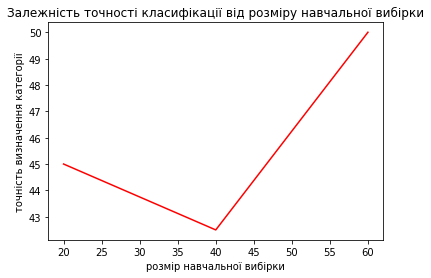

In [6]:
plt.plot([20, 40, 60], [test_10_pr, test_20_pr, test_30_pr], color = 'r')
plt.title('Залежність точності класифікації від розміру навчальної вибірки')
plt.xlabel('розмір навчальної вибірки')
plt.ylabel('точність визначення категорії')
plt.show()

In [7]:
# дебаг
print("Тестова вибірка: 40 анекдотів")
print("________________________________________________________________")
print("Навчання на 20ти анекдотах:")
model(test_10, 1)
print("________________________________________________________________")
print("Навчання на 40а анекдотах:")
model(test_20, 1)
print("________________________________________________________________")
print("Навчання на 60ти анекдотах:")
model(test_30, 1)

Тестова вибірка: 40 анекдотів
________________________________________________________________
Навчання на 20ти анекдотах:
['\ufeff1', 'фальшивого дрессировщика в цирке быстро раскусили', 'черные']
чорний гумор: -47.25854423789262 ; про блондинок: -47.067977744709104
Визначена категорія: про блондинок. Правильна категорія: чорний гумор
['2', 'блондинка стоит и задумчиво смотрит на эскалатор что она делает  удивлённо спрашивают прохожие ступеньки считает', 'блондинки']
чорний гумор: -414.9947641608201 ; про блондинок: -215.95548419448434
Визначена категорія: про блондинок. Правильна категорія: про блондинок
['3', 'доктор на что жалуетесь у меня небольшое ранение не врите я вас насквозь вижу', 'черные']
чорний гумор: -248.3350079939154 ; про блондинок: -951.0307021718919
Визначена категорія: чорний гумор. Правильна категорія: чорний гумор
['4', 'разговаривают две блондинки а че такое судопроизводство ты че ваще тупая это когда корабли делают', 'блондинки']
чорний гумор: -304.688855379824

50.0

### Гістограми частот найбільш вживаних слів

In [8]:
def histogram(res: dict, title):
      plt.xticks(rotation='vertical') 
      plt.title(title)
      plt.bar(res.keys(), res.values(), color='r', label = "Real distribution")
      plt.show()

def class_histograms(array, class_name):
    class_arr = class_array(array, class_name)
    with_stop = get_words_array(class_arr, False)
    without_stop = get_words_array(class_arr, True)
    unique_with_stop = unique_words(with_stop)
    unique_without_stop = unique_words(without_stop)
    with_stop_dict = collections.OrderedDict(sorted(unique_with_stop.items(), key=lambda x: x[1], reverse=True)[:10])
    histogram(with_stop_dict, '10 найбільш часто вживаних слів (зі стоп-словами)')
    without_stop_dict = collections.OrderedDict(sorted(unique_without_stop.items(), key=lambda x: x[1], reverse=True)[:10])
    histogram(without_stop_dict, '10 найбільш часто вживаних слів (без стоп-слів)')

#### Чорний гумор

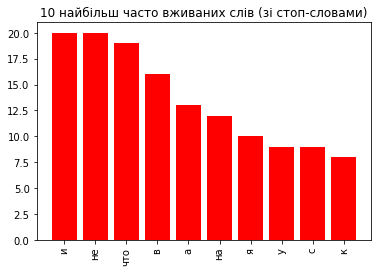

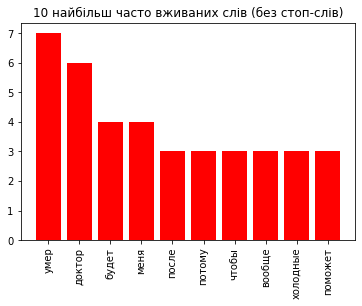

In [9]:
class_histograms(read_csv('/content/drive/MyDrive/CL/lab2/train100.csv'), 'черные')

#### Про блондинок

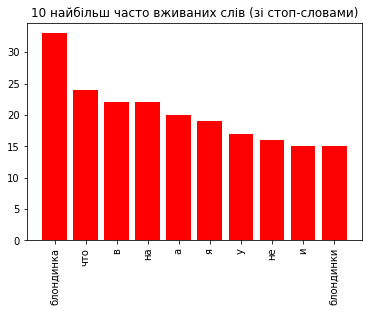

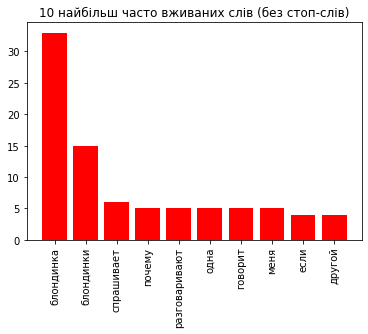

In [10]:
class_histograms(read_csv('/content/drive/MyDrive/CL/lab2/train100.csv'), 'блондинки')